## Goal:
<p>The goal of this project is to predict whether insurance policies are claimed based on some of features.</p>

## Problem:
<p>For any insurance policy, we would like to know whether some features lead to the policy claimed. Some features like age, gender or commision value could have influence on that.</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score ,roc_curve

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("data.csv")

### EDA & Preprocessing

In [ ]:
df.shape

(50553, 12)

In [ ]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


<p>So There are 6 Numerical Columns And 6 Categorical Columns</p>

<p>Now,lets check which columns have the null values</p>

In [ ]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

<p>So We Can Conclude That Only "Gender" Have The Null Values And Seems Quite Much</p>

<p>35953/50552 are null values ,nearly 71.1% data in the columns are null values</p>

<p>we can  remove the gender feature since only less then 30% of data exist</p>

<p>we can also remove ID feature</p>

In [ ]:
df = df.drop(["Gender"],axis=1)
df = df.drop(["ID"],axis=1)

In [ ]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

<p>There is no null values now</p>

<p>There are 5 Numerical Columns And 5 Categorical Columns ,so we can separate numerical and categorical data</p>

In [ ]:
df_num = df.select_dtypes(["int64","float"])

In [ ]:
df_num.head()

,Claim,Duration,Net Sales,Commision (in value),Age
0,0,7,0.0,17.82,31
1,0,85,69.0,0.00,36
2,0,11,19.8,11.88,75
3,0,16,20.0,0.00,32
4,0,10,15.0,0.00,29


In [ ]:
df_cat = df.select_dtypes(object)

In [ ]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


#### Numerical data

In [ ]:
df_num.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


#### Lests check the data in "Duration" colunm

In [ ]:
df_num["Duration"].describe()

count    50553.000000
mean        49.425969
std        101.434647
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

<p>We have negative values in this Duration column but Time  cannot be neative
    So It can be an error,cause real world data is full of error</p>

<p>Lets see how many negative values we have in duration column</p>

In [ ]:
df_num[df_num["Duration"]<0]

,Claim,Duration,Net Sales,Commision (in value),Age
4063,0,-1,18.0,6.3,118
38935,0,-1,18.0,6.3,118
48367,0,-2,22.0,7.7,118


<p>So,there are 3 negative values in duration column.We are gonna replace those with the duration "1"value</p>

In [ ]:
df_num.iloc[df_num["Duration"]<0]=1

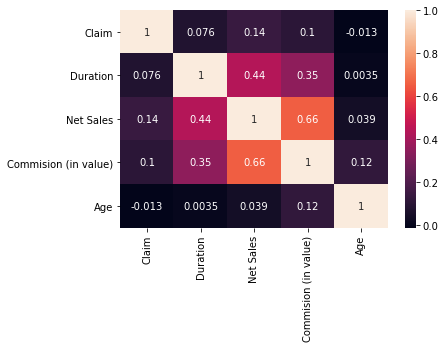

In [ ]:
plt.figure()
sns.heatmap(df_num.corr(),annot=True)
plt.show()

<p>Here we clearly see that Commision and Net Values are corelated</p>

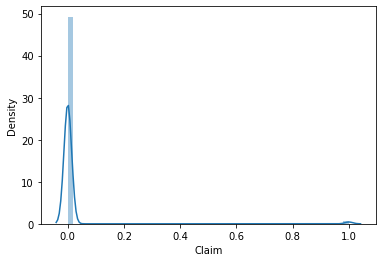

8.059932859815197


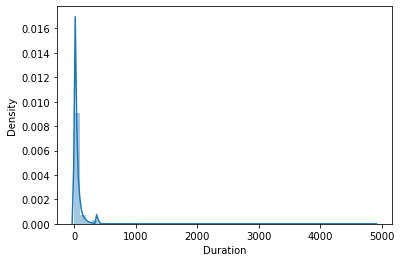

22.872106617407425


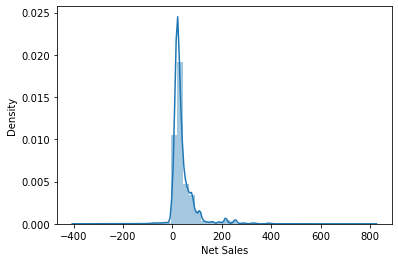

3.328045352346187


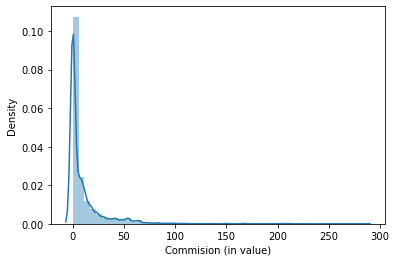

4.078052564095901


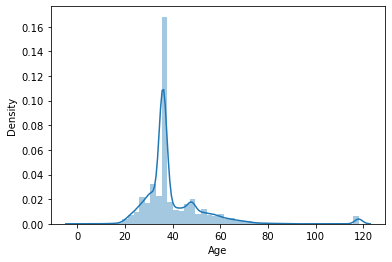

2.9746051396188773


In [ ]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print(skew(df_num[col]))

<p> From the above we can come to below conclusions:
    
     1.Here we clearly see that Commision and Net Values are corelated and 
        distributions look same(linearlly distributed)
        
     2.So we can drop any of the feature 
        "Commision" or "Net Sales".so that it shouldd not effect the model.
        
     3.Also there won't be a -ve values in Net Sales Amount.Might be outliers,
       these should be removed.
        
     4.We observe ~20% of insured are in 35-40 Age.
</p>

In [ ]:
for col in df_num:
    if skew(df_num[col]) > 0.5 or skew(df_num[col]) <-0.5:
        df_num[col] = np.sqrt(df_num[col])

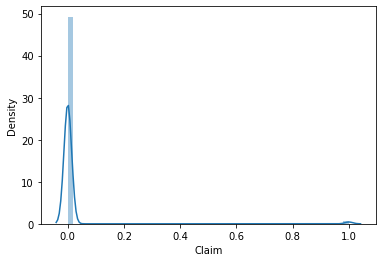

8.059932859815197


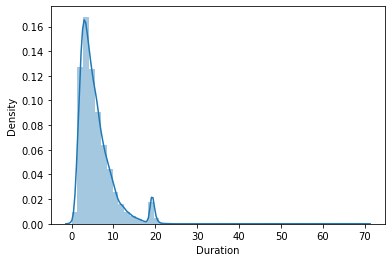

2.4093033561163213


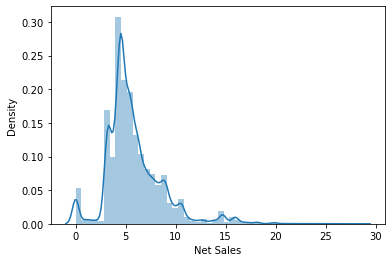

nan


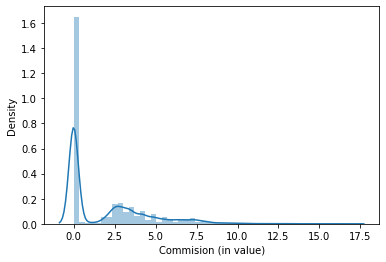

1.3514245184317524


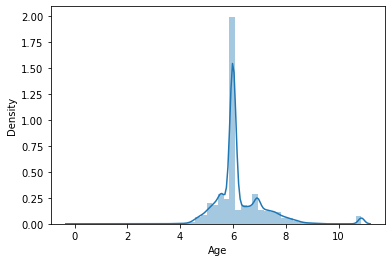

1.8845842793921406


In [ ]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print(skew(df_num[col]))

<p> Here we clearly see that Commision and Net Values are corelated. </p>

##### lets remove commision feature

In [ ]:
df_num=df_num.drop(["Commision (in value)"],axis=1)

<p>Net sales can't be neagtive.so removing those record</p>

In [ ]:
df_num = df_num[df_num["Net Sales"]>0]

In [ ]:
df_num["Net Sales"].describe()

count    48536.000000
mean         5.984404
std          2.708162
min          0.264575
25%          4.449719
50%          5.291503
75%          7.035624
max         28.460499
Name: Net Sales, dtype: float64

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48536 entries, 1 to 50552
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Claim      48536 non-null  float64
 1   Duration   48536 non-null  float64
 2   Net Sales  48536 non-null  float64
 3   Age        48536 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


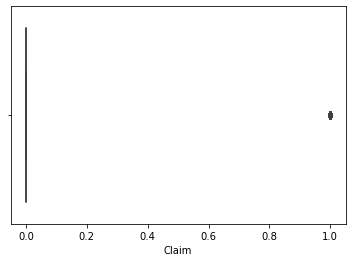

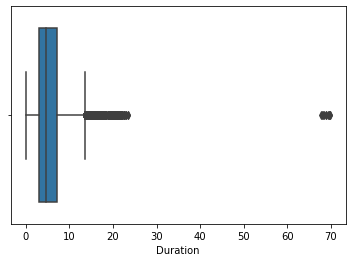

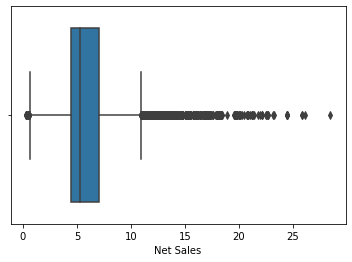

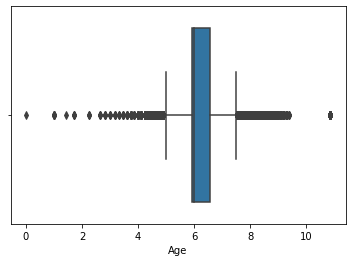

In [ ]:
for col in df_num:
    plt.figure()
    sns.boxplot(df_num[col])
    plt.show()

##### Categorical Columns

In [ ]:
print(df_cat["Agency Type"].unique())

['Travel Agency' 'Airlines']


In [ ]:
print(df_cat["Product Name"].unique())

['Rental Vehicle Excess Insurance' 'Cancellation Plan'
 '2 way Comprehensive Plan' 'Value Plan' 'Basic Plan' 'Bronze Plan'
 'Ticket Protector' '1 way Comprehensive Plan' 'Comprehensive Plan'
 'Silver Plan' 'Premier Plan' 'Annual Silver Plan' 'Annual Gold Plan'
 'Single Trip Travel Protect Silver' 'Travel Cruise Protect' '24 Protect'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Platinum'
 'Single Trip Travel Protect Gold' 'Spouse or Parents Comprehensive Plan'
 'Gold Plan' 'Annual Travel Protect Silver'
 'Individual Comprehensive Plan' 'Annual Travel Protect Platinum'
 'Child Comprehensive Plan']


In [ ]:
print(df_cat["Distribution Channel"].unique())

['Online' 'Offline']


<p>Checking distribution for Agency Type in dataset</p>

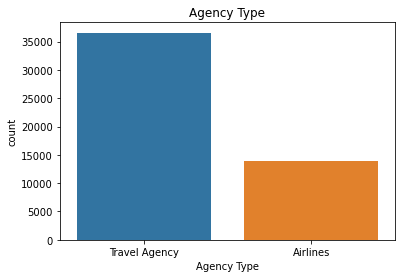

In [ ]:
plt.figure()
sns.countplot(df_cat["Agency Type"])
plt.title("Agency Type")
plt.show()

<p>Checking distribution for Distribution Channel in dataset </p>

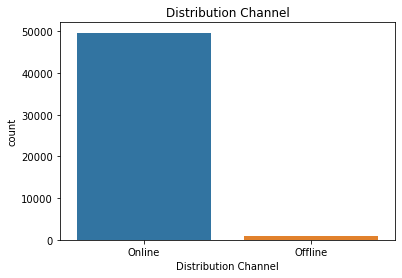

In [ ]:
plt.figure()
sns.countplot(df_cat["Distribution Channel"])
plt.title("Distribution Channel")
plt.show()

<p>Checking distribution for Agency  in dataset</p>

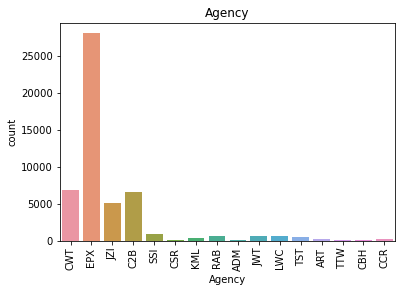

In [ ]:
plt.figure()
sns.countplot(df_cat["Agency"])
plt.xticks(rotation=90)
plt.title("Agency")
plt.show()

<p>Checking distribution for Destination in dataset</p>

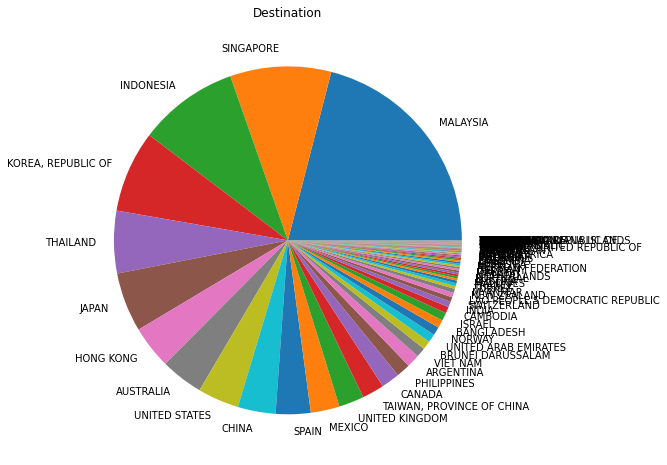

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df_cat["Destination"].value_counts(),labels=df_cat["Destination"].unique())
plt.title("Destination")
plt.show()

<p>Converting Agency,Product Name,Destination ,Agency Type and Distribution channel Feature from
categorical to numeric feature using One Hot Encoding</p>

In [ ]:
df["Claim"].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

<p> Here we can see the data set is completely imbalanced.
we are trying below methods to get best model,

1.oversmpling
    
2.undersampling
    
3.changing models like Logistic Regression,SVM,DT,Random Forest and bossting algorithms .

</p>

#### Handling Imbalance Data

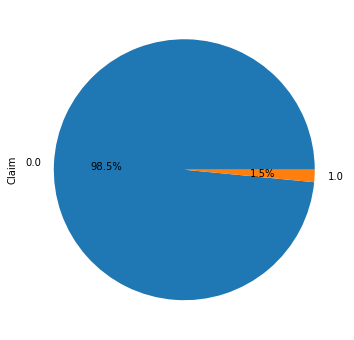

In [ ]:
plt.figure(figsize=(6,6))
df_num["Claim"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

<p> Here,'1' Says "Claimed" and "0" Says "Not Claimed"

Here we can see the data set is completely imbalanced.

</p>

In [ ]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_new = df_new.dropna()

In [ ]:
X = df_new.drop("Claim",axis=1)

In [ ]:
y = df_new["Claim"]

In [ ]:
y=y.astype("int64") 

<p> One Hot Encoding for categorical data</p>

In [ ]:
X_dummy = pd.get_dummies(X,columns=["Agency","Product Name","Destination","Distribution Channel","Agency Type"])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,test_size=0.3,random_state=1)

#### Filter Method -- Feature Selection
<p>Feature selection keeps the features intact and chooses n best features among them</p>

In [ ]:
fs = SelectKBest(score_func=chi2,k=5)
X_train_fs=fs.fit_transform(X_train,y_train)
X_test_fs = fs.transform(X_test)

# StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X_train_ss = ss.fit_transform(X_train_fs)

In [ ]:
X_test_ss = ss.transform(X_test_fs)

##### Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=1)

In [ ]:
X_sample1, y_sample1 = rus.fit_resample(X_train_ss,y_train)

In [ ]:
pd.Series(y_sample1).value_counts()

1    524
0    524
Name: Claim, dtype: int64


<p> Now ,lets try Over sampling</p>

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample2 ,y_sample2 = ros.fit_resample(X_train_ss,y_train)

In [ ]:
pd.Series(y_sample2).value_counts()

1    33451
0    33451
Name: Claim, dtype: int64

###  Modeling Process 

### Model 1-->LogisticRegression

##### LogisticRegression With Undersampling

In [ ]:
lr = LogisticRegression()

In [ ]:
score = cross_val_score(lr,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.74285714, 0.71428571, 0.72857143, 0.76076555, 0.80382775])

In [ ]:
np.mean(score)

0.7500615174299385

In [ ]:
lr.fit(X_sample1,y_sample1)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     14344
           1       0.05      0.69      0.10       217

    accuracy                           0.82     14561
   macro avg       0.52      0.75      0.50     14561
weighted avg       0.98      0.82      0.89     14561



<p>In this case ,we can see that the model achieved an estimated classification accuracy of about 82% .</p>

<AxesSubplot:>

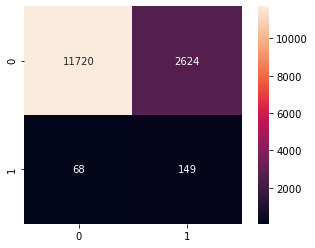

In [ ]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,square=True,fmt="d",annot=True)

#### roc_auc_curve

In [ ]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
# we tring to increses a true positive rate (recall) & presion value will reduce

In [ ]:
# to get probabilty value of y_pred

In [ ]:
prob = lr.predict_proba(X_test_ss)[:,-1]

In [ ]:
thresholds = [0.5,0.4,0.3,0.2,0.1]

In [ ]:
tprs = []
fprs = []

In [ ]:
for th in thresholds:
    y_pred = np.where(prob >=th,1,0)
    tn , fp , fn , tp = confusion_matrix(y_test,y_pred).ravel()
    
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    
    tprs.append(tpr)
    fprs.append(fpr)

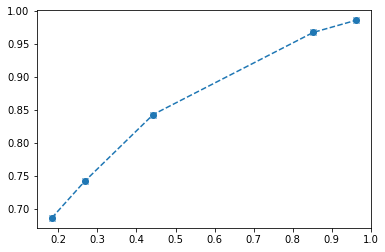

In [ ]:
plt.figure()
plt.plot(fprs,tprs,"x--")
plt.scatter(fprs,tprs)
plt.show()

In [ ]:
y_pred = np.where(prob>=0.3,1,0)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71     14344
           1       0.03      0.84      0.05       217

    accuracy                           0.56     14561
   macro avg       0.51      0.70      0.38     14561
weighted avg       0.98      0.56      0.70     14561



<p>we can see that the model achieved an estimated classification accuracy of about 56%.</p>

In [ ]:
scores = lr.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.81967391 0.18032609]
 [0.80541069 0.19458931]
 [0.16860523 0.83139477]
 ...
 [0.45198266 0.54801734]
 [0.69424709 0.30575291]
 [0.14169705 0.85830295]]


In [ ]:
y_test.value_counts()

0    14344
1      217
Name: Claim, dtype: int64

In [ ]:
roc_auc_score(y_test,y_pred)

0.700242365985489

<AxesSubplot:>

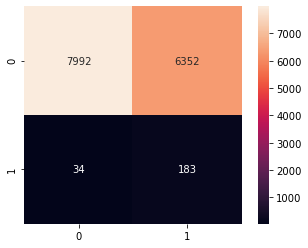

In [ ]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,square=True,fmt="d",annot=True)

##### LogisticRegression with Oversampling

In [ ]:
lr1 = LogisticRegression()

In [ ]:
lr1.fit(X_sample2,y_sample2)

LogisticRegression()

In [ ]:
score =cross_val_score(lr1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.74912189, 0.74740303, 0.74484305, 0.75201794, 0.74865471])

In [ ]:
np.mean(score)

0.7484081236932226

In [ ]:
y_pred1 = lr1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14344
           1       0.06      0.67      0.10       217

    accuracy                           0.82     14561
   macro avg       0.52      0.75      0.50     14561
weighted avg       0.98      0.82      0.89     14561



<p>We can see that model achieved an estimated classification accuracy of 82% </p>

<AxesSubplot:>

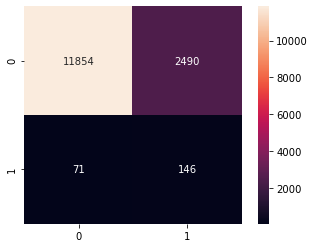

In [ ]:
mat1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(mat1,square=True,fmt="d",annot=True)

##### roc_auc_score

In [ ]:
scores = lr1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.81503514 0.18496486]
 [0.79168539 0.20831461]
 [0.17564943 0.82435057]
 ...
 [0.46827817 0.53172183]
 [0.68967358 0.31032642]
 [0.13437405 0.86562595]]


In [ ]:
roc_auc_score(y_test,y_pred1)

0.7496096571150994

<AxesSubplot:>

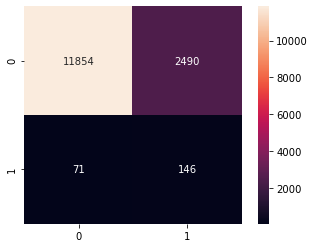

In [ ]:
mat1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(mat1,square=True,fmt="d",annot=True)

# ----------------------------------------------------------------------------------------

### Model 2--->  DecisionTreeClassifier

#### DecisionTreeClassifier with undersampling (criterion="gini")

In [ ]:
dt = DecisionTreeClassifier(max_depth=25,min_samples_leaf=30)

In [ ]:
## To avoid overffiting we are using pruning

In [ ]:
dt.fit(X_sample1,y_sample1)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=30)

In [ ]:
score = cross_val_score(dt,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.73809524, 0.7       , 0.71428571, 0.74641148, 0.79904306])

In [ ]:
np.mean(score)

0.7395670995670995

In [ ]:
y_pred2 = dt.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     14344
           1       0.04      0.72      0.08       217

    accuracy                           0.74     14561
   macro avg       0.52      0.73      0.46     14561
weighted avg       0.98      0.74      0.84     14561



</p> we can see that the model achieved an estimated classification accuracy of about 74%</p>

<AxesSubplot:>

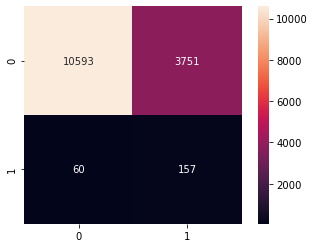

In [ ]:
mat2 = confusion_matrix(y_test,y_pred2)
sns.heatmap(mat2,square=True,fmt="d",annot=True)

#### roc_auc_score

In [ ]:
scores = dt.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.93939394 0.06060606]
 [0.58064516 0.41935484]
 [0.125      0.875     ]
 ...
 [0.24390244 0.75609756]
 [0.38709677 0.61290323]
 [0.26470588 0.73529412]]


In [ ]:
roc_auc_score(y_test,y_pred2)

0.7309996183314014

##### DecisionTreeClassifier with oversampling (criterion="gini")

In [ ]:
dt1 = DecisionTreeClassifier( max_depth=10, min_samples_leaf=35)

In [ ]:
dt1.fit(X_sample2,y_sample2)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=35)

In [ ]:
score = cross_val_score(dt1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.79590464, 0.78805769, 0.78594918, 0.7961136 , 0.79185351])

In [ ]:
np.mean(score)

0.7915757255256405

In [ ]:
y_pred3 = dt1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14344
           1       0.05      0.60      0.10       217

    accuracy                           0.83     14561
   macro avg       0.52      0.72      0.50     14561
weighted avg       0.98      0.83      0.90     14561



<p>we can see that the model achieved an estimated classification accuracy of about 83%</p>

<AxesSubplot:>

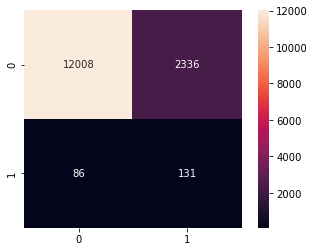

In [ ]:
mat3 = confusion_matrix(y_test,y_pred3)
sns.heatmap(mat3,square=True,fmt="d",annot=True)

##### roc_auc_score

In [ ]:
scores = dt1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[1.         0.        ]
 [1.         0.        ]
 [0.11550985 0.88449015]
 ...
 [0.34298851 0.65701149]
 [0.68635579 0.31364421]
 [0.17163578 0.82836422]]


In [ ]:
roc_auc_score(y_test,y_pred3)

0.7204155432930419

##### DecisionTreeClassifier with undersampling (criterion="entropy")

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=30)

In [ ]:
dt2.fit(X_sample1,y_sample1)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=30)

In [ ]:
score = cross_val_score(dt2,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.71428571, 0.7       , 0.71428571, 0.73205742, 0.79904306])

In [ ]:
np.mean(score)

0.7319343814080657

In [ ]:
y_pred4 = dt2.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     14344
           1       0.04      0.72      0.08       217

    accuracy                           0.74     14561
   macro avg       0.52      0.73      0.46     14561
weighted avg       0.98      0.74      0.84     14561



<p>we can see that the model achieved an estimated classification accuracy of about 74%.</p>

<AxesSubplot:>

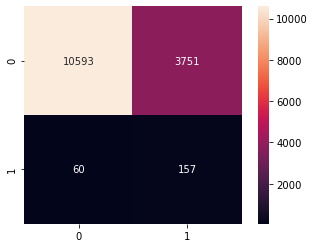

In [ ]:
mat4 = confusion_matrix(y_test,y_pred4)
sns.heatmap(mat4,square=True,fmt="d",annot=True)

##### roc_auc_score

In [ ]:
scores = dt2.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.93939394 0.06060606]
 [0.58064516 0.41935484]
 [0.125      0.875     ]
 ...
 [0.24390244 0.75609756]
 [0.38709677 0.61290323]
 [0.26470588 0.73529412]]


In [ ]:
roc_auc_score(y_test,y_pred4)

0.7309996183314014

##### DecisionTreeClassifier with oversampling (criterion="entropy")

In [ ]:
dt3 = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_leaf=30)

In [ ]:
dt3.fit(X_sample2,y_sample2)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=30)

In [ ]:
score = cross_val_score(dt3,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.88281892, 0.86196846, 0.88064275, 0.87301943, 0.86995516])

In [ ]:
np.mean(score)

0.8736809448821361

In [ ]:
y_pred5 = dt3.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14344
           1       0.04      0.52      0.07       217

    accuracy                           0.81     14561
   macro avg       0.52      0.66      0.48     14561
weighted avg       0.98      0.81      0.88     14561



<p>we can see that the model achieved an estimated classification accuracy of about 81%.</p>

<AxesSubplot:>

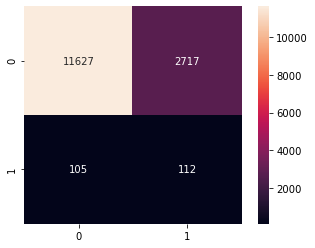

In [ ]:
mat5 = confusion_matrix(y_test,y_pred5)
sns.heatmap(mat5,square=True,annot=True,fmt='d')

In [ ]:
scores = dt3.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[1.         0.        ]
 [1.         0.        ]
 [0.0890411  0.9109589 ]
 ...
 [0.28089888 0.71910112]
 [1.         0.        ]
 [0.25806452 0.74193548]]


In [ ]:
y_test.value_counts()

0    14344
1      217
Name: Claim, dtype: int64

In [ ]:
roc_auc_score(y_test,y_pred5)

0.663355927171977

# ----------------------------------------------------------------------------------------

### Model 3---> RandomForestClassifier

#### Random Forest using undersampling

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
rfc.fit(X_sample1,y_sample1)

RandomForestClassifier(random_state=1)

In [ ]:
score = cross_val_score(rfc,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.71904762, 0.66190476, 0.66190476, 0.68421053, 0.72727273])

In [ ]:
np.mean(score)

0.690868079289132

In [ ]:
y_pred6 = rfc.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83     14344
           1       0.04      0.68      0.07       217

    accuracy                           0.72     14561
   macro avg       0.51      0.70      0.45     14561
weighted avg       0.98      0.72      0.82     14561



<p>we can see that the model achieved an estimated classification accuracy of about 72%.</P>

<AxesSubplot:>

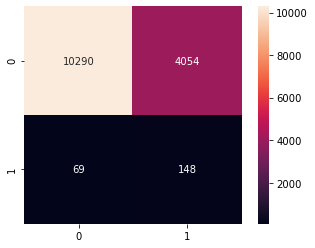

In [ ]:
mat6 = confusion_matrix(y_test,y_pred6)
sns.heatmap(mat6,square=True,annot=True,fmt='d')

#### roc_auc_score

In [ ]:
scores = rfc.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.99       0.01      ]
 [0.2        0.8       ]
 [0.45453968 0.54546032]
 ...
 [0.43       0.57      ]
 [0.64       0.36      ]
 [0.37       0.63      ]]


In [ ]:
roc_auc_score(y_test,y_pred6)

0.6997003837247258

#### Random Forest using oversampling

In [ ]:
rfc1 = RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
rfc1.fit(X_sample2,y_sample2)

RandomForestClassifier(random_state=1)

In [ ]:
score = cross_val_score(rfc1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.96674389, 0.96906061, 0.96696562, 0.96651719, 0.96599402])

In [ ]:
np.mean(score)

0.967056266001511

In [ ]:
y_pred7 = rfc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     14344
           1       0.06      0.24      0.09       217

    accuracy                           0.93     14561
   macro avg       0.52      0.59      0.53     14561
weighted avg       0.97      0.93      0.95     14561



<p>we can see that the model achieved an estimated classification accuracy of about 93%.</p>

<AxesSubplot:>

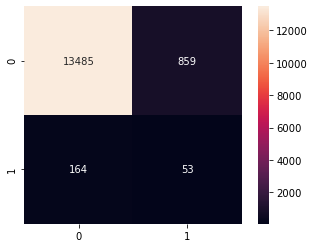

In [ ]:
mat7 = confusion_matrix(y_test,y_pred7)
sns.heatmap(mat7,square=True,annot=True,fmt='d')

##### roc_auc_score

In [ ]:
scores = rfc1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[1.         0.        ]
 [1.         0.        ]
 [0.08873261 0.91126739]
 ...
 [0.93101158 0.06898842]
 [1.         0.        ]
 [0.99       0.01      ]]


In [ ]:
roc_auc_score(y_test,y_pred7)

0.5921769824278235

# ----------------------------------------------------------------------------------------

### Model 4---> Gradient Boosting

####  Gradient boosting using Undersampling

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_sample1,y_sample1)

GradientBoostingClassifier()

In [ ]:
score = cross_val_score(gb,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.73333333, 0.69047619, 0.73333333, 0.73684211, 0.77511962])

In [ ]:
np.mean(score)

0.733820915926179

In [ ]:
y_pred8 = gb.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14344
           1       0.05      0.68      0.09       217

    accuracy                           0.79     14561
   macro avg       0.52      0.73      0.48     14561
weighted avg       0.98      0.79      0.87     14561



<p>we can see that the model achieved an estimated classification accuracy of about 79%.</p>

<AxesSubplot:>

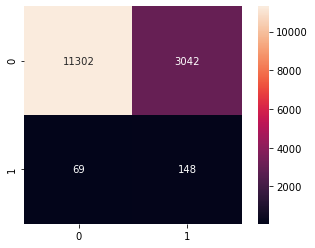

In [ ]:
mat8 = confusion_matrix(y_test,y_pred8)
sns.heatmap(mat8,square=True,annot=True,fmt="d")

##### roc_auc_score

In [ ]:
scores = gb.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.90891763 0.09108237]
 [0.68728215 0.31271785]
 [0.20750994 0.79249006]
 ...
 [0.51371832 0.48628168]
 [0.66455812 0.33544188]
 [0.14183155 0.85816845]]


In [ ]:
roc_auc_score(y_test,y_pred8)

0.7349764573443577

#### Gradient boosting using oversampling

In [ ]:
gb1 = GradientBoostingClassifier()

In [ ]:
gb1.fit(X_sample2,y_sample2)

GradientBoostingClassifier()

In [ ]:
score = cross_val_score(gb1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.77535311, 0.76892609, 0.77518685, 0.7793722 , 0.77892377])

In [ ]:
np.mean(score)

0.7755524024035598

In [ ]:
y_pred9 = gb1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14344
           1       0.06      0.62      0.10       217

    accuracy                           0.84     14561
   macro avg       0.52      0.73      0.51     14561
weighted avg       0.98      0.84      0.90     14561



<p>we can see that the model achieved an estimated classification accuracy of about 84%.</p>

In [ ]:
mat9 =confusion_matrix(y_test,y_pred9)

<AxesSubplot:>

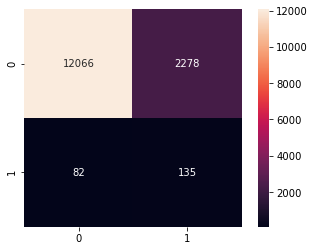

In [ ]:
sns.heatmap(mat9,square=True,annot=True,fmt='d')

##### roc_auc_score

In [ ]:
scores = gb1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.93821629 0.06178371]
 [0.79911765 0.20088235]
 [0.12283619 0.87716381]
 ...
 [0.52734187 0.47265813]
 [0.64333975 0.35666025]
 [0.12498626 0.87501374]]


In [ ]:
roc_auc_score(y_test,y_pred9)

0.731653884409673

# ----------------------------------------------------------------------------------------

### Model 5 ---> Adaboost Classifier

#### Adaboost classifier unsing undersampling

In [ ]:
aba = AdaBoostClassifier(n_estimators=100)

In [ ]:
aba.fit(X_sample1,y_sample1)

AdaBoostClassifier(n_estimators=100)

In [ ]:
score = cross_val_score(aba,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.73809524, 0.6952381 , 0.72380952, 0.73684211, 0.77511962])

In [ ]:
np.mean(score)

0.733820915926179

In [ ]:
y_pred10 = aba.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     14344
           1       0.04      0.69      0.08       217

    accuracy                           0.78     14561
   macro avg       0.52      0.73      0.48     14561
weighted avg       0.98      0.78      0.86     14561



<p>we can see that the model achieved an estimated classification accuracy of about 78%.</p>

<AxesSubplot:>

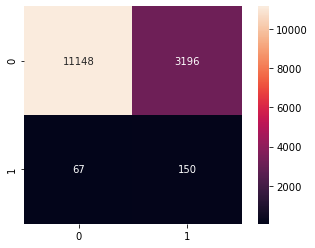

In [ ]:
mat10 = confusion_matrix(y_test,y_pred10)
sns.heatmap(mat10 ,square=True,annot=True,fmt='d')

##### roc_auc_score

In [ ]:
scores = aba.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.50623058 0.49376942]
 [0.50432542 0.49567458]
 [0.49715241 0.50284759]
 ...
 [0.49922692 0.50077308]
 [0.50097437 0.49902563]
 [0.496382   0.503618  ]]


In [ ]:
roc_auc_score(y_test,y_pred10)

0.7342166541157239

#### Adaboost classifier unsing oversampling

In [ ]:
aba1 = AdaBoostClassifier(n_estimators=100)

In [ ]:
aba1.fit(X_sample2,y_sample2)

AdaBoostClassifier(n_estimators=100)

In [ ]:
score = cross_val_score(aba1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.76376952, 0.75883716, 0.75358744, 0.76240658, 0.76180867])

In [ ]:
np.mean(score)

0.7600818743395947

In [ ]:
y_pred11 = aba1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     14344
           1       0.05      0.66      0.09       217

    accuracy                           0.80     14561
   macro avg       0.52      0.73      0.49     14561
weighted avg       0.98      0.80      0.87     14561



<p>we can see that the model achieved an estimated classification accuracy of about 80%.</p>

In [ ]:
mat11 = confusion_matrix(y_test,y_pred11)

<AxesSubplot:>

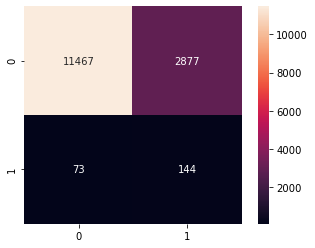

In [ ]:
sns.heatmap(mat11,square=True,annot=True,fmt="d")

##### roc_auc_score

In [ ]:
scores = aba1.predict_proba(X_test_ss)

In [ ]:
print(scores)

[[0.50705755 0.49294245]
 [0.50512655 0.49487345]
 [0.49504108 0.50495892]
 ...
 [0.49995975 0.50004025]
 [0.50110857 0.49889143]
 [0.49486754 0.50513246]]


In [ ]:
roc_auc_score(y_test,y_pred11)

0.7315114012249377

# ----------------------------------------------------------------------------------------

### Model 6 ---> SVC

#### LinearSVC usning Undersampling

In [ ]:
lsvc = LinearSVC(random_state=1)

In [ ]:
lsvc.fit(X_sample1,y_sample1)

LinearSVC(random_state=1)

In [ ]:
score = cross_val_score(lsvc,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.73809524, 0.7       , 0.73333333, 0.76555024, 0.81339713])

In [ ]:
np.mean(score)

0.7500751879699248

In [ ]:
y_pred14 = lsvc.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred14))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     14344
           1       0.06      0.66      0.10       217

    accuracy                           0.83     14561
   macro avg       0.52      0.75      0.50     14561
weighted avg       0.98      0.83      0.89     14561



<p>we can see that the model achieved an estimated classification accuracy of about 83%.</p>

<AxesSubplot:>

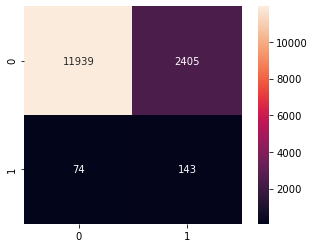

In [ ]:
mat14 = confusion_matrix(y_test,y_pred14)
sns.heatmap(mat14 ,square=True,annot=True,fmt='d')

##### Soft Margin

In [ ]:
lsv = LinearSVC(C=0.5,random_state=1)

In [ ]:
### C will perform regularization

In [ ]:
lsv.fit(X_sample1,y_sample1)

LinearSVC(C=0.5, random_state=1)

In [ ]:
score = cross_val_score(lsv,X_sample1,y_sample1,cv=5)

In [ ]:
score

array([0.73809524, 0.7       , 0.73333333, 0.76555024, 0.81339713])

In [ ]:
np.mean(score)

0.7500751879699248

In [ ]:
y_pred16 = lsv.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred16))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     14344
           1       0.06      0.66      0.10       217

    accuracy                           0.83     14561
   macro avg       0.52      0.75      0.50     14561
weighted avg       0.98      0.83      0.89     14561



<p>we can see that the model achieved an estimated classification accuracy of about 83%.</p>

<AxesSubplot:>

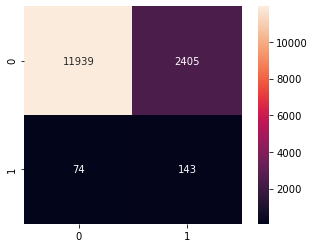

In [ ]:
mat16 = confusion_matrix(y_test,y_pred16)
sns.heatmap(mat16,square=True,annot=True,fmt='d')

# ----------------------------------------------------------------------------------------


#### LinearSVC usning Oversampling

In [ ]:
lsvc1 = LinearSVC(random_state=1)

In [ ]:
lsvc1.fit(X_sample2,y_sample2)

LinearSVC(random_state=1)

In [ ]:
score = cross_val_score(lsvc1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.74598311, 0.74501158, 0.7435725 , 0.7509716 , 0.74745889])

In [ ]:
np.mean(score)

0.7465995367011364

In [ ]:
y_pred17 = lsvc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred17))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     14344
           1       0.06      0.65      0.11       217

    accuracy                           0.84     14561
   macro avg       0.53      0.75      0.51     14561
weighted avg       0.98      0.84      0.90     14561



<p>we can see that the model achieved an estimated classification accuracy of about 84%.</p>

<AxesSubplot:>

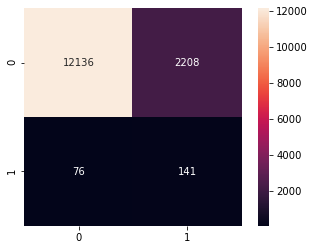

In [ ]:
mat17 = confusion_matrix(y_test,y_pred17)
sns.heatmap(mat17,square=True,annot=True,fmt='d')

#### Soft Margin

In [ ]:
lsv1 = LinearSVC(C=0.5,random_state=1)

In [ ]:
lsv1.fit(X_sample2,y_sample2)

LinearSVC(C=0.5, random_state=1)

In [ ]:
score = cross_val_score(lsv1,X_sample2,y_sample2,cv=5)

In [ ]:
score

array([0.74598311, 0.74501158, 0.7435725 , 0.75089686, 0.74753363])

In [ ]:
np.mean(score)

0.7465995367011364

In [ ]:
y_pred18 = lsv1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred18))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     14344
           1       0.06      0.65      0.11       217

    accuracy                           0.84     14561
   macro avg       0.53      0.75      0.51     14561
weighted avg       0.98      0.84      0.90     14561



<p>we can see that the model achieved an estimated classification accuracy of about 84%.</p>

In [ ]:
mat18 = confusion_matrix(y_test,y_pred18)

<AxesSubplot:>

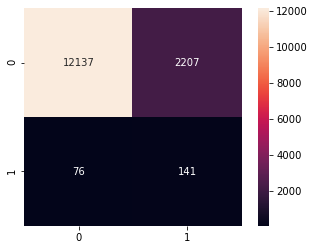

In [ ]:
sns.heatmap(mat18,square=True,annot=True,fmt='d')

### Ensambling (Undersampling)


#### Naive Aggregation

#### Hard Voting

In [ ]:
model_list = [("lr",lr),("dt",dt),("dt2",dt2),("rfc",rfc),("gb",gb),("aba",aba),("lsv",lsv)]

In [ ]:
vc1 = VotingClassifier(estimators=model_list)

In [ ]:
vc1.fit(X_sample1,y_sample1)
y_pred20 = vc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred20))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14344
           1       0.05      0.70      0.09       217

    accuracy                           0.79     14561
   macro avg       0.52      0.75      0.49     14561
weighted avg       0.98      0.79      0.87     14561



#### Soft Voting

In [ ]:
vc2 = VotingClassifier(estimators=model_list,voting="soft")

In [ ]:
vc2.fit(X_sample1,y_sample1)
y_pred21 = vc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred21))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14344
           1       0.05      0.70      0.09       217

    accuracy                           0.79     14561
   macro avg       0.52      0.75      0.49     14561
weighted avg       0.98      0.79      0.87     14561



In [ ]:
mat21 = confusion_matrix(y_test,y_pred21)

<AxesSubplot:>

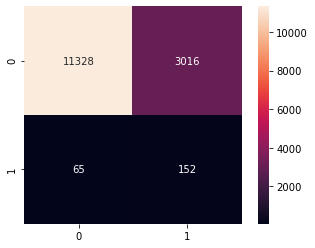

In [ ]:
sns.heatmap(mat21,square=True,annot=True,fmt='d')

<p>we can see that the model achieved an estimated classification accuracy of about 79%.</p>

### Ensambling (oversampling)

#### Hard voting

In [ ]:
model_list1 = [("lr1",lr1),("dt1",dt1),("dt3",dt3),("rfc1",rfc1),("gb1",gb1),("aba1",aba1),("lsv1",lsv1)]

In [ ]:
vc3 = VotingClassifier(estimators=model_list1)

In [ ]:
vc3.fit(X_sample2,y_sample2)
y_pred22 = vc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred22))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14344
           1       0.05      0.70      0.09       217

    accuracy                           0.79     14561
   macro avg       0.52      0.75      0.49     14561
weighted avg       0.98      0.79      0.87     14561



#### Soft Voting

In [ ]:
vc4 = VotingClassifier(estimators=model_list1,voting="soft")

In [ ]:
vc4.fit(X_sample2,y_sample2)
y_pred23 = vc1.predict(X_test_ss)

In [ ]:
print(classification_report(y_test,y_pred23))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14344
           1       0.05      0.70      0.09       217

    accuracy                           0.79     14561
   macro avg       0.52      0.75      0.49     14561
weighted avg       0.98      0.79      0.87     14561



In [ ]:
mat23 = confusion_matrix(y_test,y_pred23)

<AxesSubplot:>

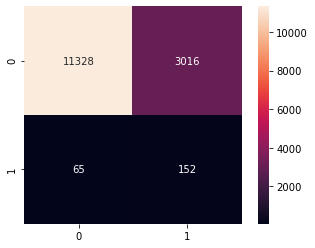

In [ ]:
sns.heatmap(mat23,square=True,annot=True,fmt='d')

<p>we can see that the model achieved an estimated classification accuracy of about 79%.</p>

## Conclusion

<p>We have a simple overview of some techniques and algorithms in machine learning.
    Furthermore, there are more and more techniques apply machine learning as a solution.
    <b>The best model seem to be the Random Forest model, which is the model with the unbalanced dataset     The model generated an Accuracy of 93%.Random forest is a great algorithm for classification problems to produce a predictive model.its default hyperparameters already return great results and it is  great at avoiding overfitting.</b> So this project gives different ways of adressing the         task with unbalanced data.Using Supervised learning LinearSVC, Adaboost, GradientBoosting ,           DecisionTreeClassifier,Logistic Regression and Random Forest.
</p>